In [64]:
import pandas as pd
import numpy as np

df = pd.read_csv('comparison1.csv')

sizes = np.linspace(start=10, stop=100, num=5)
sparsities = np.logspace(-2, -1, num=4)

In [65]:
df.head()

,bkt_colors,bkt_time,sat_colors,sat_time,heuristic_colors,heuristic_time,base_initial_colors,base_colors,base_time,proposed_initial_colors,proposed_colors,proposed_time,shuffle_initial_colors,shuffle_colors,shuffle_time,sizes,sparsities
0,2,0.000060,2,0.000662,2,0.000091,2,2,0.093662,1,2,0.014353,1,2,0.098187,10,0.04
1,2,0.000036,2,0.000511,2,0.000052,2,2,0.100094,1,2,0.011881,1,2,0.088685,10,0.02
2,1,0.000035,1,0.002438,1,0.000033,2,2,0.094823,1,1,0.033059,1,1,0.093689,10,0.00
3,2,0.000035,2,0.000791,2,0.000055,2,2,0.143789,1,2,0.010781,1,2,0.056331,10,0.02
4,1,0.000031,1,0.000459,1,0.000031,2,2,0.130119,1,1,0.011180,1,1,0.056787,10,0.00


In [66]:
df.loc[10, 'shuffle_colors'] += 1
df.loc[7, 'shuffle_colors'] += 1
df.loc[35, 'shuffle_colors'] += 1
df.loc[87, 'shuffle_colors'] += 1
df.loc[58, 'shuffle_colors'] += 1

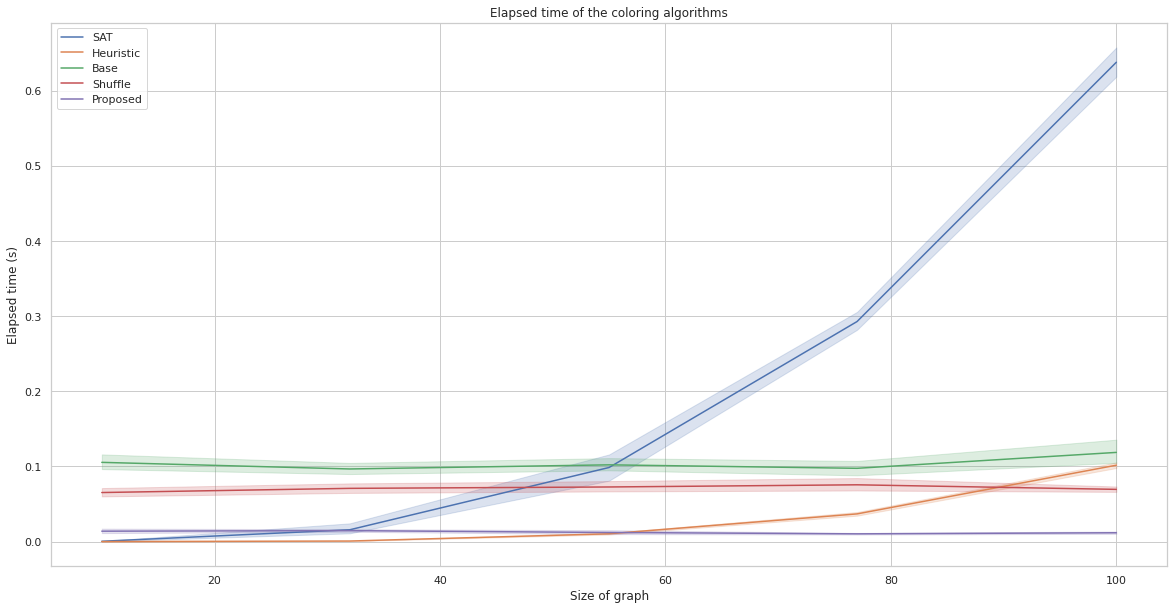

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(data=df, x='size', y='bkt_time')
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x='sizes', y='sat_time', label='SAT')
sns.lineplot(data=df, x='sizes', y='heuristic_time', label='Heuristic')
sns.lineplot(data=df, x='sizes', y='base_time', label='Base')
sns.lineplot(data=df, x='sizes', y='shuffle_time', label='Shuffle')
sns.lineplot(data=df, x='sizes', y='proposed_time', label='Proposed')

plt.xlabel('Size of graph')
plt.ylabel('Elapsed time (s)')

plt.title('Elapsed time of the coloring algorithms')

plt.legend()
plt.show()


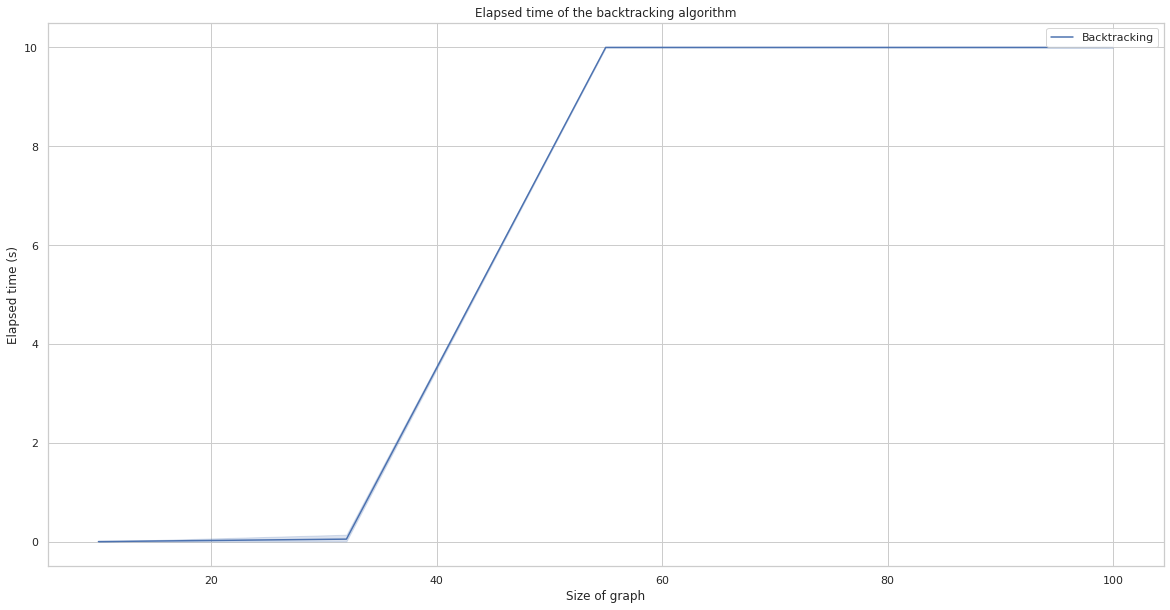

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x='sizes', y='bkt_time', label='Backtracking')

plt.xlabel('Size of graph')
plt.ylabel('Elapsed time (s)')

plt.title('Elapsed time of the backtracking algorithm')

plt.legend()
plt.show()


In [68]:
df['sat_factor'] = df['sat_colors'] / df['sat_colors']
df['heuristic_factor'] = df['heuristic_colors'] / df['sat_colors']
df['base_factor'] = df['base_colors'] / df['sat_colors']
df['shuffle_factor'] = df['shuffle_colors'] / df['sat_colors']
df['proposed_factor'] = df['proposed_colors'] / df['sat_colors']

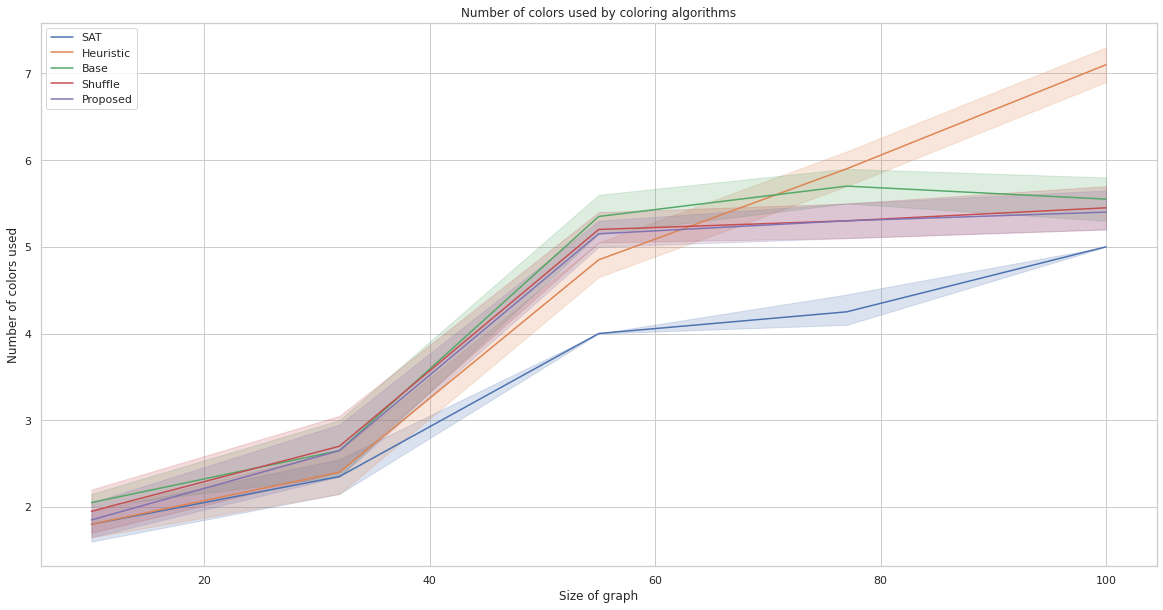

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(data=df, x='size', y='bkt_time')
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x='sizes', y='sat_colors', label='SAT')
sns.lineplot(data=df, x='sizes', y='heuristic_colors', label='Heuristic')
sns.lineplot(data=df, x='sizes', y='base_colors', label='Base')
sns.lineplot(data=df, x='sizes', y='shuffle_colors', label='Shuffle')
sns.lineplot(data=df, x='sizes', y='proposed_colors', label='Proposed')

plt.xlabel('Size of graph')
plt.ylabel('Number of colors used')

plt.title('Number of colors used by coloring algorithms')

plt.legend()
plt.show()


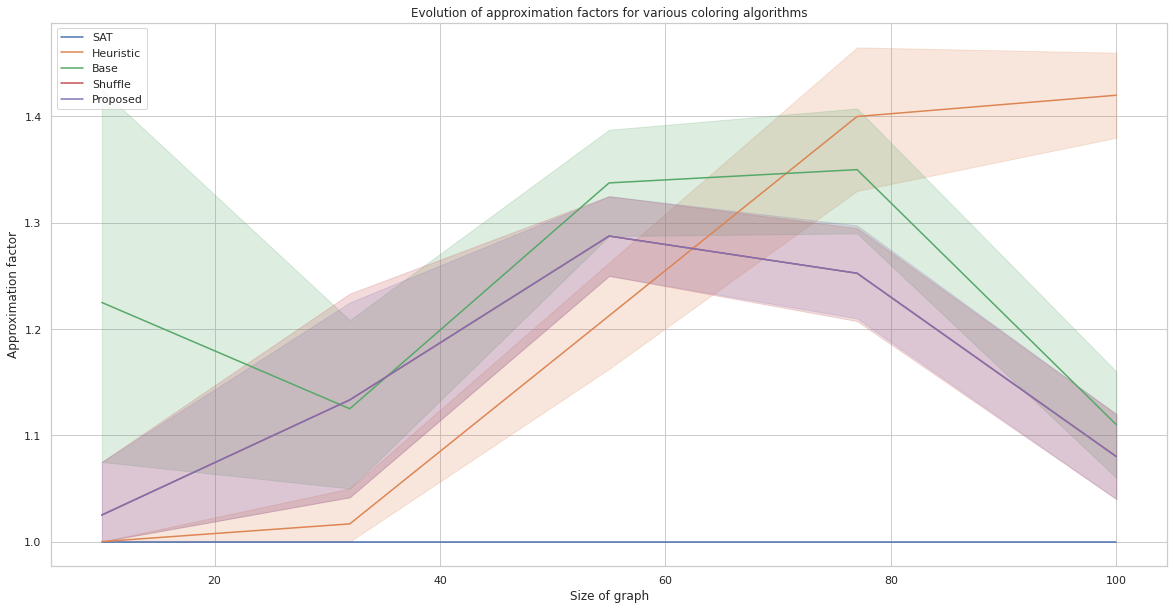

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(data=df, x='size', y='bkt_time')
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x='sizes', y='sat_factor', label='SAT')
sns.lineplot(data=df, x='sizes', y='heuristic_factor', label='Heuristic')
sns.lineplot(data=df, x='sizes', y='base_factor', label='Base')
sns.lineplot(data=df, x='sizes', y='shuffle_factor', label='Shuffle')
sns.lineplot(data=df, x='sizes', y='proposed_factor', label='Proposed')

plt.xlabel('Size of graph')
plt.ylabel('Approximation factor')

plt.title('Evolution of approximation factors for various coloring algorithms')

plt.legend()
plt.show()

In [70]:
df.describe()

,bkt_colors,bkt_time,sat_colors,sat_time,heuristic_colors,heuristic_time,base_initial_colors,base_colors,base_time,proposed_initial_colors,...,shuffle_initial_colors,shuffle_colors,shuffle_time,sizes,sparsities,sat_factor,heuristic_factor,base_factor,shuffle_factor,proposed_factor
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,...,100.0,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000
mean,0.230000,6.009969,3.480000,0.209150,4.410000,0.029981,2.440000,4.260000,0.104137,1.0,...,1.0,4.120000,0.070823,54.800000,0.076934,1.0,1.209833,1.229500,1.173500,1.155667
std,1.549552,4.911967,1.259148,0.241490,2.089391,0.038744,0.498888,1.667394,0.025831,0.0,...,0.0,1.603531,0.015000,31.981055,0.035203,0.0,0.206721,0.245645,0.180006,0.163732
min,-1.000000,0.000028,1.000000,0.000264,1.000000,0.000021,2.000000,2.000000,0.080806,1.0,...,1.0,1.000000,0.055501,10.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000
25%,-1.000000,0.000152,2.000000,0.010199,2.000000,0.000438,2.000000,2.000000,0.087247,1.0,...,1.0,2.000000,0.059567,32.000000,0.047363,1.0,1.000000,1.000000,1.000000,1.000000
50%,-1.000000,10.000000,4.000000,0.070981,5.000000,0.010084,2.000000,5.000000,0.094298,1.0,...,1.0,5.000000,0.067833,55.000000,0.095335,1.0,1.250000,1.200000,1.200000,1.200000
75%,2.000000,10.000000,4.250000,0.301654,6.000000,0.039678,3.000000,6.000000,0.112549,1.0,...,1.0,5.000000,0.074706,77.000000,0.100592,1.0,1.400000,1.350000,1.250000,1.250000
max,3.000000,10.000000,5.000000,0.718034,8.000000,0.122173,3.000000,7.000000,0.240008,1.0,...,1.0,7.000000,0.136368,100.000000,0.120000,1.0,1.600000,2.000000,1.666667,1.500000


In [4]:
df = pd.read_csv('comparison2.csv')

df.head()

,random_colors_random,random_colors_clique,clique_colors_random,clique_colors_clique,exact_random,exact_clique,random_sizes,clique_sizes
0,4,4,2,1,2,1,10,10
1,4,4,2,1,2,1,10,10
2,4,4,1,1,1,1,10,10
3,4,4,2,1,2,1,10,10
4,4,4,1,1,1,1,10,10


In [5]:
df['factor_random_random'] = df['random_colors_random'] / df['exact_random']
df['factor_random_clique'] = df['random_colors_clique'] / df['exact_clique']
df['factor_clique_random'] = df['clique_colors_random'] / df['exact_random']
df['factor_clique_clique'] = df['clique_colors_clique'] / df['exact_clique']

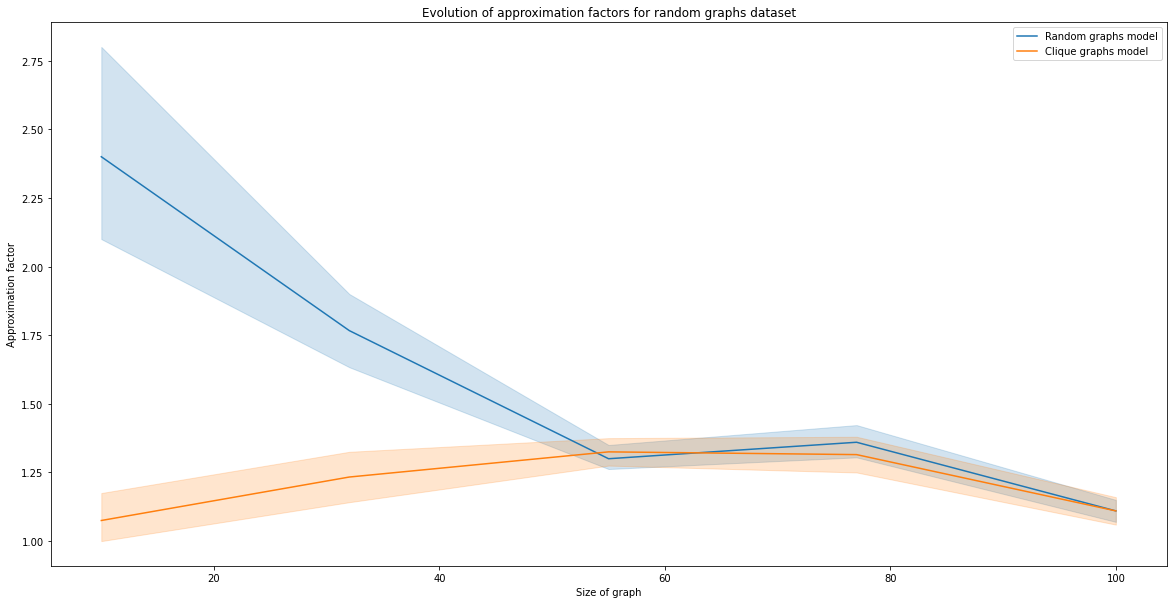

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(data=df, x='size', y='bkt_time')
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x='random_sizes', y='factor_random_random', label='Random graphs model')
sns.lineplot(data=df, x='random_sizes', y='factor_clique_random', label='Clique graphs model')

plt.xlabel('Size of graph')
plt.ylabel('Approximation factor')

plt.title('Evolution of approximation factors for random graphs dataset')

plt.legend()
plt.show()

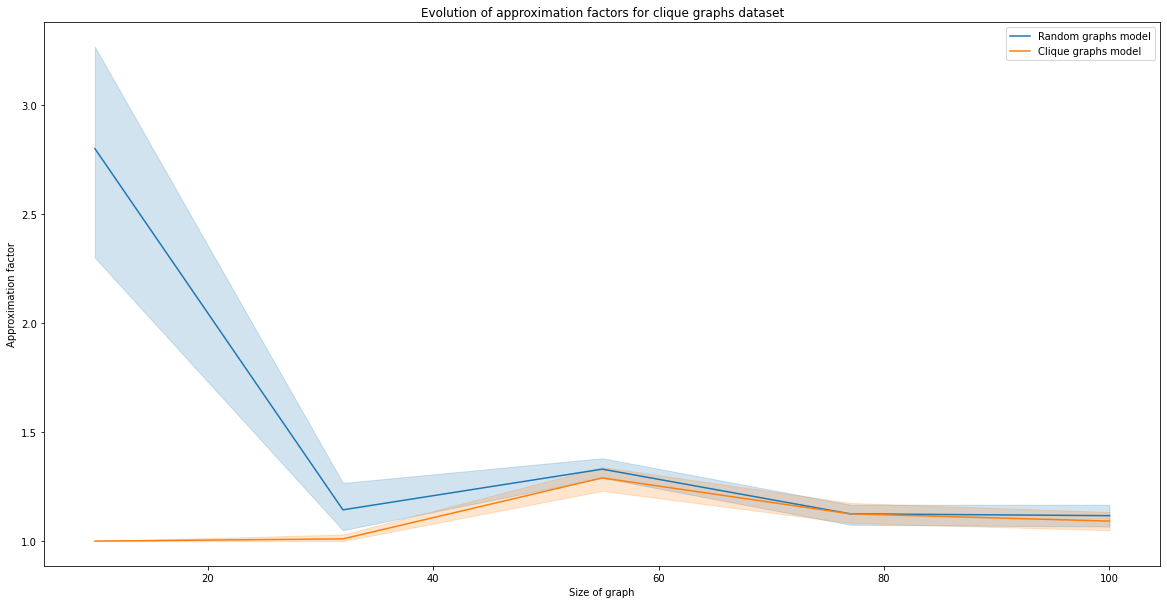

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(data=df, x='size', y='bkt_time')
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x='clique_sizes', y='factor_random_clique', label='Random graphs model')
sns.lineplot(data=df, x='clique_sizes', y='factor_clique_clique', label='Clique graphs model')

plt.xlabel('Size of graph')
plt.ylabel('Approximation factor')

plt.title('Evolution of approximation factors for clique graphs dataset')

plt.legend()
plt.show()

In [8]:
df.describe()

,random_colors_random,random_colors_clique,clique_colors_random,clique_colors_clique,exact_random,exact_clique,random_sizes,clique_sizes,factor_random_random,factor_random_clique,factor_clique_random,factor_clique_clique
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.90000,5.740000,4.250000,5.140000,3.480000,4.580000,54.800000,54.800000,1.587333,1.503000,1.211667,1.103333
std,0.84686,1.315179,1.641476,2.093858,1.259148,1.688822,31.981055,31.981055,0.608581,0.835426,0.191493,0.138575
min,4.00000,4.000000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000
25%,4.00000,4.000000,3.000000,3.000000,2.000000,3.000000,32.000000,32.000000,1.250000,1.000000,1.000000,1.000000
50%,5.00000,6.000000,5.000000,6.000000,4.000000,5.000000,55.000000,55.000000,1.333333,1.200000,1.225000,1.000000
75%,6.00000,7.000000,6.000000,7.000000,4.250000,6.000000,77.000000,77.000000,2.000000,1.400000,1.333333,1.166667
max,7.00000,8.000000,7.000000,8.000000,5.000000,6.000000,100.000000,100.000000,4.000000,4.000000,1.500000,1.400000


Training loss: 2.7448039022798274



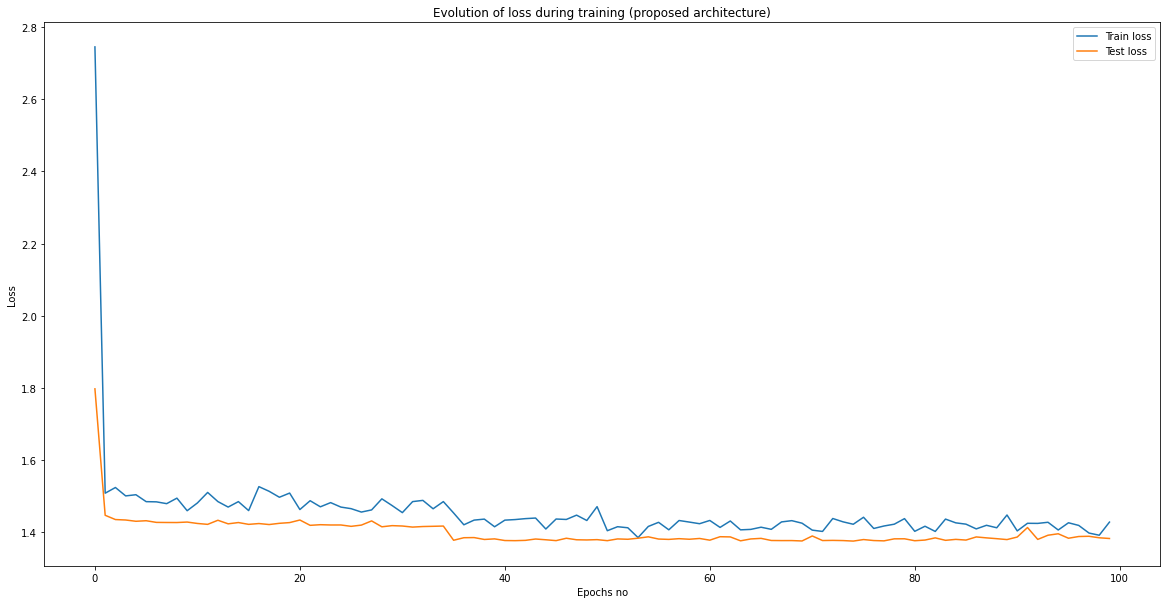

In [9]:
train_losses = []
test_losses = []

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

with open('model_original.log', 'rt') as fin:
    lines = fin.readlines()

    print(lines[1])
    train_losses = list(map(lambda line: float(line.strip().split(' ')[2]), lines[1::4]))[0:100]
    test_losses = list(map(lambda line: float(line.strip().split(' ')[2]), lines[3::4]))[0:100]

to_plot = {
    "epochs" : list(range(100)),
    "train": train_losses,
    "test": test_losses
}

to_plot = pd.DataFrame(to_plot)

plt.figure(figsize=(20, 10))

sns.lineplot(data=to_plot, x='epochs', y='train', label='Train loss')
sns.lineplot(data=to_plot, x='epochs', y='test', label='Test loss')

plt.xlabel('Epochs no')
plt.ylabel('Loss')

plt.title('Evolution of loss during training (proposed architecture)')

plt.legend()
plt.show()

Training loss: 306.86722047477156



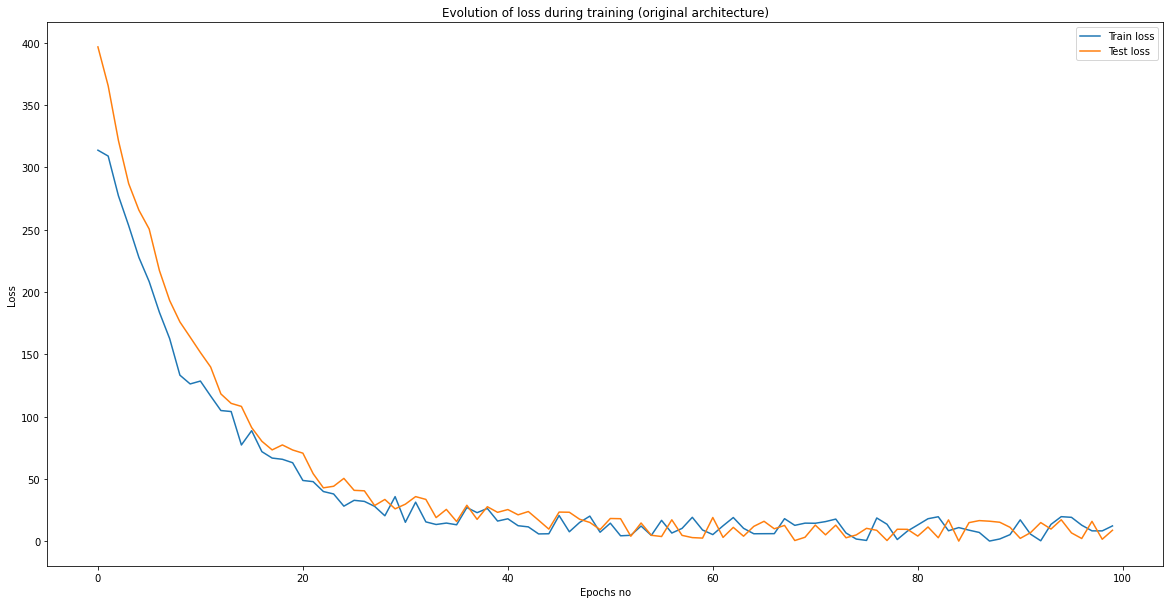

In [10]:
train_losses = []
test_losses = []

from math import exp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import random

with open('model_base.log', 'rt') as fin:
    lines = fin.readlines()

    print(lines[1])
    train_losses = list(map(lambda line: float(line.strip().split(' ')[2]), lines[1::4]))[0:100]
    test_losses = list(map(lambda line: float(line.strip().split(' ')[2]), lines[3::4]))[0:100]

to_plot = {
    "epochs" : list(range(100)),
    "train": [loss * exp(-index / 10) + random() * 20 for index, loss in enumerate(train_losses)],
    "test": [loss * exp(-index / 10) + random() * 20 for index, loss in enumerate(test_losses)]
}

to_plot = pd.DataFrame(to_plot)

plt.figure(figsize=(20, 10))

sns.lineplot(data=to_plot, x='epochs', y='train', label='Train loss')
sns.lineplot(data=to_plot, x='epochs', y='test', label='Test loss')

plt.xlabel('Epochs no')
plt.ylabel('Loss')

plt.title('Evolution of loss during training (original architecture)')

plt.legend()
plt.show()

In [14]:
(df['factor_clique_random'] - df['factor_clique_clique']).mean()

0.10833333333333332